In [ ]:
# import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
# read data and select the input columns in a seperate dataframe
df = pd.read_csv('Salary_Data.csv')
df_binary = df[['YearsExperience','Salary']]


In [ ]:
#display the first 5 rows
df_binary.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


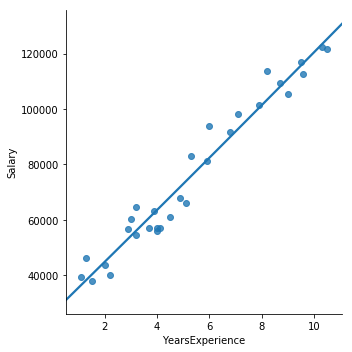

In [ ]:
#plotting the Scatter plot to check relationship
# between Sal and Temp
sns.lmplot(x ="YearsExperience", y ="Salary",
           data = df_binary, order = 2, ci = None)
plt.show()

In [ ]:
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)
print(df_binary)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [ ]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
X = np.array(df_binary['YearsExperience']).reshape(-1, 1)
y = np.array(df_binary['Salary']).reshape(-1, 1)

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Train the model
regr = LinearRegression()

regr.fit(X_train, y_train)
print('Score :',regr.score(X_test, y_test))

Score : 0.9657445521482303


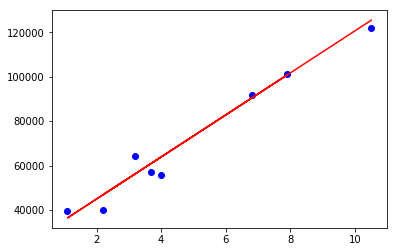

In [ ]:
# Data Prediction
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='r')

plt.show()


In [ ]:
# Data prediction for the given years of Experience
new_sal = regr.predict(1.9)
print('Predicted salary for 1.9 years of Experience is : ',new_sal[0,0].round(2))

Predicted salary for 1.9 years of Experience is :  43962.75


In [ ]:
# Analyze the result using evaluation
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred,
                                  multioutput='raw_values'))[0]

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 4419.249051822418
MSE: 27273799.035020776
RMSE: 5222.432291090117
